# This code was adapted and changed from content in the Code Institute LMS
Credits:
- I referenced my team's hackathon project to help to structure my project

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mohammedluqmanriaz/Desktop/Code Instatute/capstone_try_two/2025_capstone_project/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mohammedluqmanriaz/Desktop/Code Instatute/capstone_try_two/2025_capstone_project'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jupyter_notebooks/Data_set/transactions.csv')  # Make sure this path is correct


In [5]:
# Updated function to create a data dictionary
def create_data_dictionary(df):
    descriptions = {
        'transaction_id': 'Unique identifier for each transaction',
        'customer_id': 'Unique identifier assigned to each customer (e.g., CUSTXXXXX)',
        'transaction_date': 'Date and time when the transaction occurred',
        'transaction_type': 'Type of transaction (e.g., UPI, Debit Card, Bill Payment)',
        'transaction_amount': 'Amount involved in the transaction'
    }

    dictionary_data = []
    for column in df.columns:
        sample_values = df[column].dropna().head(3).tolist()
        sample_str = ', '.join([str(x) for x in sample_values])
        
        dictionary_data.append({
            'Column': column,
            'Data Type': str(df[column].dtype),
            'Missing Values': df[column].isnull().sum(),
            'Missing %': round((df[column].isnull().sum() / len(df)) * 100, 2),
            'Unique Values': df[column].nunique(),
            'Sample Values': sample_str,
            'Description': descriptions.get(column, 'Custom/Engineered column - description needed')
        })
        
    return pd.DataFrame(dictionary_data)

# Generate and display the data dictionary
raw_data_dictionary = create_data_dictionary(df)
print(raw_data_dictionary)

# Optional: Save to file
# raw_data_dictionary.to_csv('data_dictionary.csv', index=False)

                               Column Data Type  Missing Values  Missing %  \
0                      transaction_id    object               0        0.0   
1                         customer_id    object               0        0.0   
2                    transaction_date    object               0        0.0   
3                    transaction_type    object               0        0.0   
4                  transaction_amount   float64               0        0.0   
5                   merchant_category    object               0        0.0   
6                       merchant_name    object               0        0.0   
7                transaction_location    object               0        0.0   
8   account_balance_after_transaction   float64               0        0.0   
9        is_international_transaction     int64               0        0.0   
10                        device_used    object               0        0.0   
11                         ip_address    object               0 

In [6]:
# Check for duplicate customer IDs
duplicate_customer_ids = df[df.duplicated(subset='customer_id', keep=False)]
duplicate_customer_count = duplicate_customer_ids['customer_id'].nunique()
print(f"\nNumber of duplicate customer IDs: {duplicate_customer_count}")
print("Duplicate customer ID records:")
print(duplicate_customer_ids.sort_values(by='customer_id').head(10))  # Display first 10 for brevity

# Check for duplicate transaction IDs
duplicate_transaction_ids = df[df.duplicated(subset='transaction_id', keep=False)]
duplicate_transaction_count = duplicate_transaction_ids['transaction_id'].nunique()
print(f"\nNumber of duplicate transaction IDs: {duplicate_transaction_count}")
if duplicate_transaction_count > 0:
    print("Duplicate transaction ID records:")
    print(duplicate_transaction_ids.sort_values(by='transaction_id'))
else:
    print("No duplicate transaction IDs found.")


Number of duplicate customer IDs: 14256
Duplicate customer ID records:
                             transaction_id customer_id     transaction_date  \
40586  832f55da-cf8c-4631-9056-d93e9c3b69df  CUST100000  2022-01-15 19:37:00   
8200   ee57f580-a235-48b8-a562-bdfc09061af4  CUST100000  2022-01-20 15:33:00   
32002  eacc300c-a6f4-4c24-9e33-734618fbc363  CUST100001  2022-01-20 19:20:00   
40783  dcefbaad-116c-446b-9a53-2fefa2c93ab3  CUST100001  2022-01-04 18:10:00   
27843  ec304a78-a139-4b56-a6f3-a56a6f9a965c  CUST100001  2022-01-25 17:19:00   
37407  6c3aa45b-6723-4317-9b1b-fb1e7884a2d3  CUST100003  2022-01-04 17:27:00   
26373  0392509a-fcc9-4d11-9130-784af62f3b2b  CUST100003  2022-01-25 09:15:00   
31660  e67bc3a2-f581-4741-be79-233b4c1c2691  CUST100003  2022-01-01 05:18:00   
32667  03a54f00-fa13-41a5-ad5e-f4974aa606ba  CUST100005  2022-01-18 11:15:00   
7140   db28cc87-b314-41b0-8e2c-d113ebb365ad  CUST100005  2022-01-21 03:28:00   

        transaction_type  transaction_amount   


Decide:

Drop rows/columns

Fill with mean/median/mode/forward-fill (for time series)

Impute or flag as unknown



In [7]:
df.isnull().sum()

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64

✅ 2. Check for Duplicates
You've already done this, but to summarize:

Check for duplicate rows entirely:

python

Edit
df.duplicated().sum()
Remove them if necessary:

python

df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

Validate Data Types

df.dtypes

Convert date strings to datetime


In [9]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

Check for Outliers in Numeric Columns
within the transaction amount

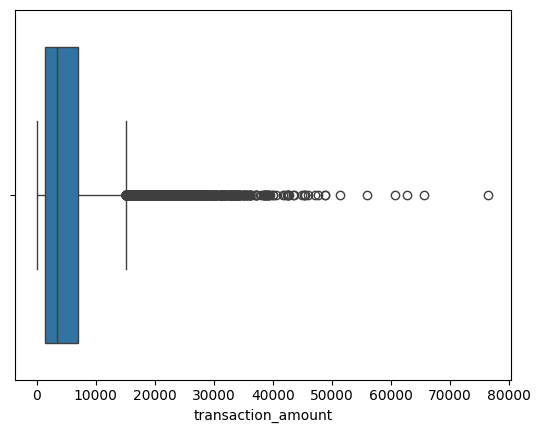

In [10]:
sns.boxplot(x=df['transaction_amount'])
plt.show()

Check for Invalid or Inconsistent Entries
Negative amounts? (e.g., refunds or errors)

Unrecognized transaction types?

In [11]:
df['transaction_type'].value_counts()
df[~df['customer_id'].str.startswith('CUST')]

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag


Standardize Categorical Values
Make sure categories are consistent:

In [12]:
df['transaction_type'] = df['transaction_type'].str.strip().str.title()

Check Date Ranges
Ensure transaction_date is within expected limits (e.g., not in the future):

In [13]:
df[df['transaction_date'] > pd.Timestamp.today()]

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag


Remove Unnecessary Columns
If there are columns that:

Contain only one value

Are irrelevant to your analysis

You can remove them:

In [14]:
#df = df.drop(columns=['column_name'])

Handle Zero or Near-Zero Variance Columns
Columns with almost no variance may not be useful:

In [15]:
df.nunique()

transaction_id                       50000
customer_id                          18318
transaction_date                     30012
transaction_type                        10
transaction_amount                     639
merchant_category                       12
merchant_name                        35312
transaction_location                  8823
account_balance_after_transaction    30267
is_international_transaction             2
device_used                              4
ip_address                           50000
transaction_status                       2
transaction_source_destination       39993
transaction_notes                       12
fraud_flag                               2
dtype: int64

In [16]:
df.to_csv('jupyter_notebooks/Data_set/transactions_clean.csv', index=False)